In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotting_common

In [2]:
plotting_common.setup_plotting_style()

In [5]:
df = pd.read_json("data/size-comparison.json")
total_negatives = 8402298293
total_one_past = 210286406
total_positives = 187636299
total_normalized_positives = 23475688

df["rate_false_positives_in_one_past"] = df["false_positives_in_one_past"] / total_one_past
df["rate_false_positives"] = df["false_positives"] / total_negatives

df["ratio"] = df["rate_false_positives_in_one_past"] / df["rate_false_positives"]

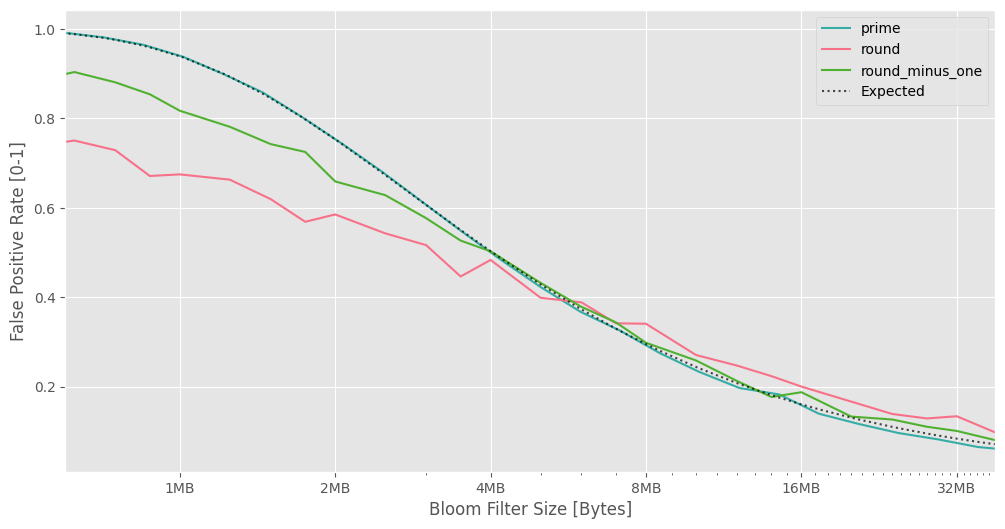

In [20]:
for category in df["size_category"].unique():
    marker = plotting_common.category_markers[category]
    color = plotting_common.category_colors[category]

    data = df[df["size_category"] == category].sort_values("size")

    plt.plot(data["size"] / 8, data["false_positives"] / total_negatives, label=category, color=color)
    # plt.plot(data["size"] / 8, data["false_positives_in_one_past"] / total_one_past, label=f"{category} False Positives in One-Past", color=color, linestyle="--")

    # plt.plot(data["size"] / 8, data["ratio"], label=f"{category} Ratio", marker=marker)

k = 1
x = np.sort(df["size"])
y = np.pow(1 - np.exp(-k / (x / total_normalized_positives)), k)

plt.plot(x / 8, y, label="Expected", color="black", linestyle=":", alpha=0.7)

plt.xscale('log')
plt.xlabel("Bloom Filter Size [Bytes]")
plt.ylabel("False Positive Rate [0-1]")
plt.xlim(0.6 * 2**20, 38 * 2**20)

plotting_common.setup_bytes_formatters(plt.gca().xaxis)
plt.gca().xaxis.set_major_locator(plt.LogLocator(base=2))
plt.gca().xaxis.set_ticks([m * 2**20 for m in range(2, 38)], minor=True)
plt.gcf().set_size_inches(12, 6)
_ = plt.legend()


In [6]:
df_steps = pd.read_json("../server/solver-steps-preshuffled-5-attempts-cache.json").rename(columns={0: "steps", 1: "size"})
df_steps = df_steps[df_steps["size"] >= min_size]

df_steps["median"] = df_steps["steps"].apply(lambda x: np.median(x))
df_steps["5%"] = df_steps["steps"].apply(lambda x: np.percentile(x, 5))
df_steps["95%"] = df_steps["steps"].apply(lambda x: np.percentile(x, 95))
df_steps["25%"] = df_steps["steps"].apply(lambda x: np.percentile(x, 25))
df_steps["75%"] = df_steps["steps"].apply(lambda x: np.percentile(x, 75))
df_steps["std"] = df_steps["steps"].apply(lambda x: np.std(x))

del df_steps["steps"]

df_steps

,size,median,5%,95%,25%,75%,std
8,17314499,131072.0,21995.55,131072.00,131072.00,131072.00,37207.209546
9,20671811,131072.0,19992.05,131072.00,131072.00,131072.00,37265.683144
10,24680099,131072.0,3466.55,131072.00,110408.00,131072.00,41998.854112
11,29465591,131072.0,6750.75,131072.00,42060.75,131072.00,49138.446562
12,35178973,131072.0,1818.25,131072.00,42831.50,131072.00,49371.288216
13,42000191,68831.0,1126.50,131072.00,20137.25,131072.00,52878.021641
14,50144069,49246.0,667.95,131072.00,12051.00,131072.00,53472.071783
15,59867009,13633.5,217.15,131072.00,2254.00,55660.00,46043.761223
16,71475233,7662.0,155.40,110556.70,1412.25,32842.25,33687.497501
17,85334297,2142.5,156.50,38796.40,567.00,11576.75,14404.982699


In [ ]:
df_joined = df.join(df_steps.set_index('size'), on="size", validate="one_to_one", sort=True, rsuffix="_right")

,size,size_category,false_positives,false_positives_in_one_past,rate_false_positives_in_one_past,rate_false_positives,ratio,median,5%,95%,25%,75%,std
60,16777215,round_minus_one,5537796506,134177366,0.638070,0.659081,0.968120,114540.5,800.00,131072.00,40110.50,131072.00,51398.676508
34,16777216,round,4917717832,115021440,0.546975,0.585282,0.934549,36039.5,252.05,131072.00,9257.25,131072.00,54214.116241
8,17314499,prime,6245393369,156439831,0.743937,0.743296,1.000863,131072.0,21995.55,131072.00,131072.00,131072.00,37207.209546
9,20671811,prime,5722132618,142744874,0.678812,0.681020,0.996757,131072.0,19992.05,131072.00,131072.00,131072.00,37265.683144
61,20971519,round_minus_one,5280345201,125918889,0.598797,0.628441,0.952830,118205.5,1006.10,131072.00,24295.50,131072.00,52860.240169
35,20971520,round,4562103990,100090806,0.475974,0.542959,0.876629,37863.0,107.75,131072.00,4853.25,131072.00,54716.142164
10,24680099,prime,5161580337,128734045,0.612184,0.614306,0.996547,131072.0,3466.55,131072.00,110408.00,131072.00,41998.854112
62,25165823,round_minus_one,4848219035,114609133,0.545014,0.577011,0.944548,67787.0,302.15,131072.00,13218.25,131072.00,53449.864189
36,25165824,round,4341274924,98544674,0.468621,0.516677,0.906991,22159.0,107.75,131072.00,6123.25,114405.75,52703.282642
63,29360127,round_minus_one,4425852850,103435677,0.491880,0.526743,0.933814,46621.0,198.65,131072.00,10324.25,131072.00,54225.598406


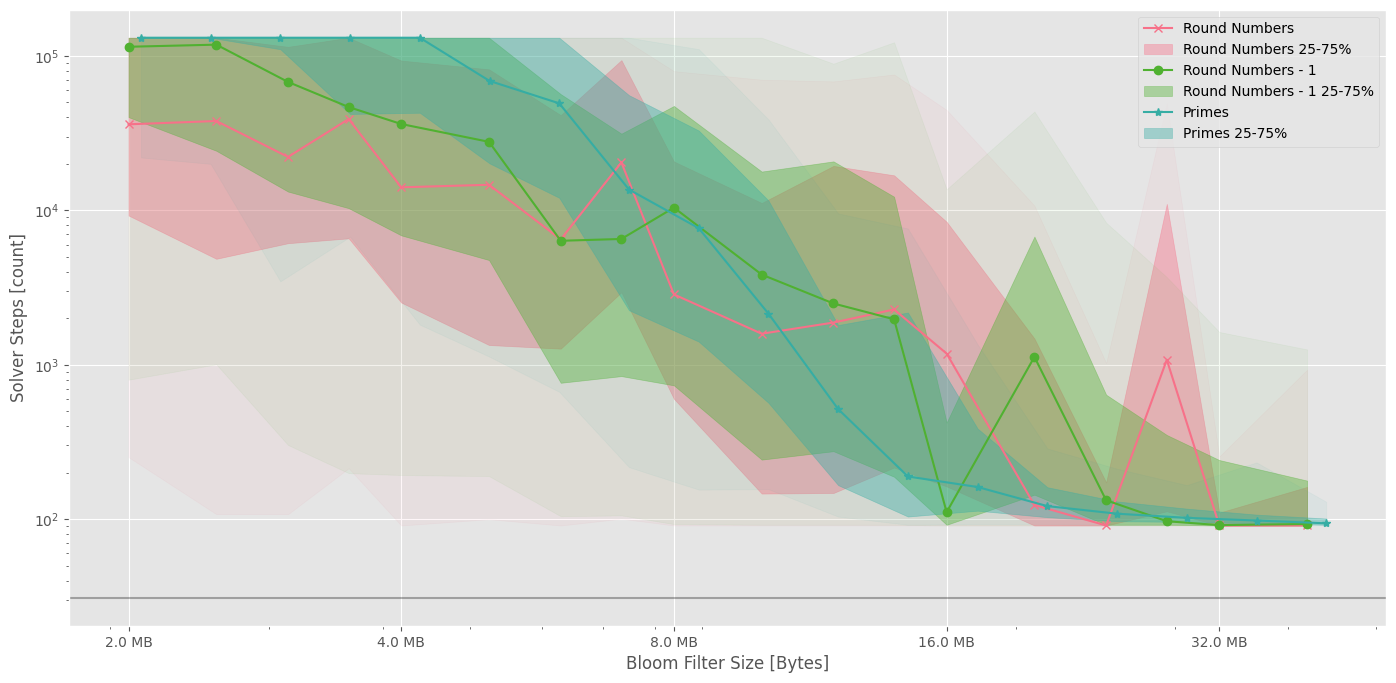

In [328]:
for category, category_name in [("round", "Round Numbers"), ("round_minus_one", "Round Numbers - 1"), ("prime", "Primes")]:
    marker = category_markers[category]
    color = category_colors[category]

    data = df_joined[df_joined["size_category"] == category]

    plt.plot(data["size"] / 8, data["median"], label=f"{category_name}", marker=marker, color=color)
    plt.fill_between(data["size"] / 8, data["5%"], data["95%"], alpha=0.06, color=color)
    plt.fill_between(data["size"] / 8, data["25%"], data["75%"], alpha=0.4, color=color, label=f"{category_name} 25-75%")

x = np.sort(df_joined["size"])
plt.axhline(31, color="black", alpha=0.3)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Bloom Filter Size [Bytes]")
plt.ylabel("Solver Steps [count]")

def bytes_to_human_readable(x, pos):
    if x < 1024:
        return "{:.0f} B".format(x)
    elif x < 1024**2:
        return "{:.1f} KB".format(x / 1024)
    else:
        return "{:.1f} MB".format(x / 1024**2)

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(bytes_to_human_readable))
plt.gca().xaxis.set_major_locator(plt.LogLocator(base=2))
plt.gcf().set_size_inches(17, 8)
plt.legend()


preshuffled 5 attempts cache

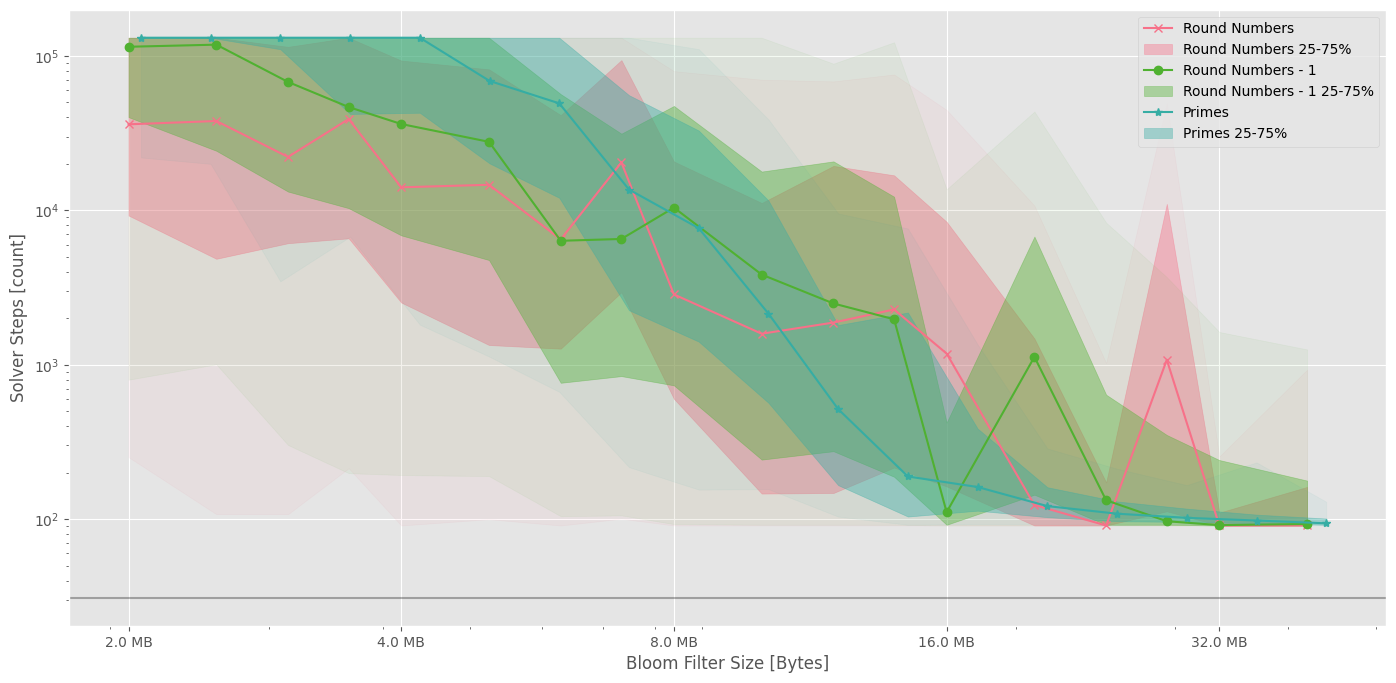

In [ ]:
for category, category_name in [("round", "Round Numbers"), ("round_minus_one", "Round Numbers - 1"), ("prime", "Primes")]:
    marker = category_markers[category]
    color = category_colors[category]

    data = df_joined[df_joined["size_category"] == category]

    plt.plot(data["size"] / 8, data["median"], label=f"{category_name}", marker=marker, color=color)
    plt.fill_between(data["size"] / 8, data["5%"], data["95%"], alpha=0.06, color=color)
    plt.fill_between(data["size"] / 8, data["25%"], data["75%"], alpha=0.4, color=color, label=f"{category_name} 25-75%")

x = np.sort(df_joined["size"])
plt.axhline(31, color="black", alpha=0.3)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Bloom Filter Size [Bytes]")
plt.ylabel("Solver Steps [count]")

def bytes_to_human_readable(x, pos):
    if x < 1024:
        return "{:.0f} B".format(x)
    elif x < 1024**2:
        return "{:.1f} KB".format(x / 1024)
    else:
        return "{:.1f} MB".format(x / 1024**2)

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(bytes_to_human_readable))
plt.gca().xaxis.set_major_locator(plt.LogLocator(base=2))
plt.gcf().set_size_inches(17, 8)
plt.legend()


preshuffled restarting 100 attempts

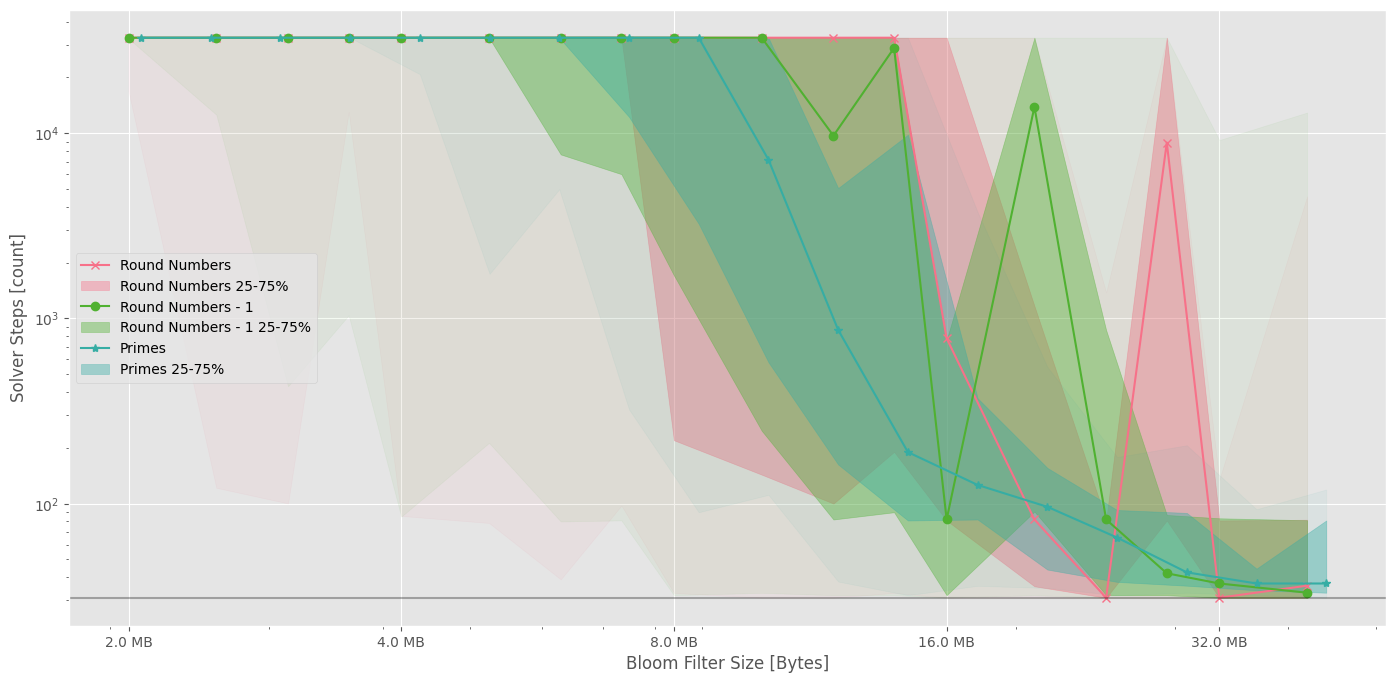

In [ ]:
for category, category_name in [("round", "Round Numbers"), ("round_minus_one", "Round Numbers - 1"), ("prime", "Primes")]:
    marker = category_markers[category]
    color = category_colors[category]

    data = df_joined[df_joined["size_category"] == category]

    plt.plot(data["size"] / 8, data["median"], label=f"{category_name}", marker=marker, color=color)
    plt.fill_between(data["size"] / 8, data["5%"], data["95%"], alpha=0.06, color=color)
    plt.fill_between(data["size"] / 8, data["25%"], data["75%"], alpha=0.4, color=color, label=f"{category_name} 25-75%")

x = np.sort(df_joined["size"])
plt.axhline(31, color="black", alpha=0.3)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Bloom Filter Size [Bytes]")
plt.ylabel("Solver Steps [count]")

def bytes_to_human_readable(x, pos):
    if x < 1024:
        return "{:.0f} B".format(x)
    elif x < 1024**2:
        return "{:.1f} KB".format(x / 1024)
    else:
        return "{:.1f} MB".format(x / 1024**2)

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(bytes_to_human_readable))
plt.gca().xaxis.set_major_locator(plt.LogLocator(base=2))
plt.gcf().set_size_inches(17, 8)
plt.legend()


preshuffled restarting 10 attempts

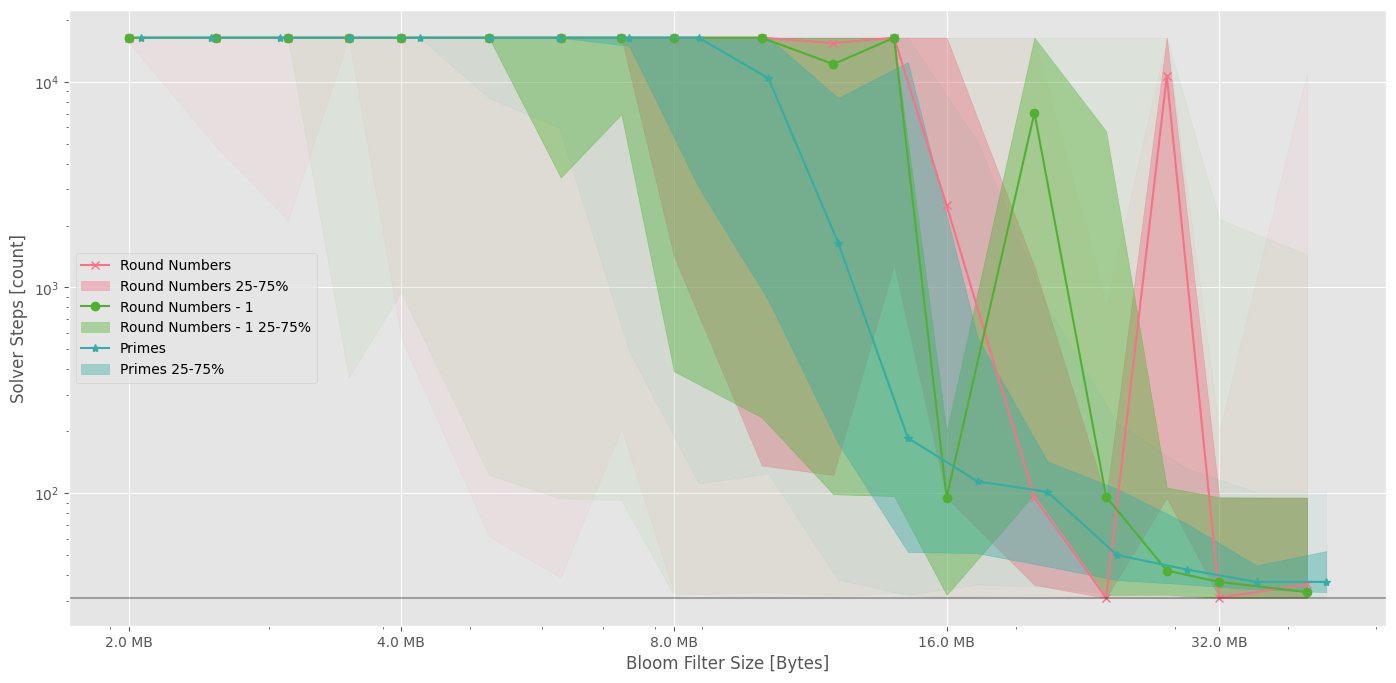

In [ ]:
for category, category_name in [("round", "Round Numbers"), ("round_minus_one", "Round Numbers - 1"), ("prime", "Primes")]:
    marker = category_markers[category]
    color = category_colors[category]

    data = df_joined[df_joined["size_category"] == category]

    plt.plot(data["size"] / 8, data["median"], label=f"{category_name}", marker=marker, color=color)
    plt.fill_between(data["size"] / 8, data["5%"], data["95%"], alpha=0.06, color=color)
    plt.fill_between(data["size"] / 8, data["25%"], data["75%"], alpha=0.4, color=color, label=f"{category_name} 25-75%")

x = np.sort(df_joined["size"])
plt.axhline(31, color="black", alpha=0.3)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Bloom Filter Size [Bytes]")
plt.ylabel("Solver Steps [count]")

def bytes_to_human_readable(x, pos):
    if x < 1024:
        return "{:.0f} B".format(x)
    elif x < 1024**2:
        return "{:.1f} KB".format(x / 1024)
    else:
        return "{:.1f} MB".format(x / 1024**2)

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(bytes_to_human_readable))
plt.gca().xaxis.set_major_locator(plt.LogLocator(base=2))
plt.gcf().set_size_inches(17, 8)
plt.legend()


suspense

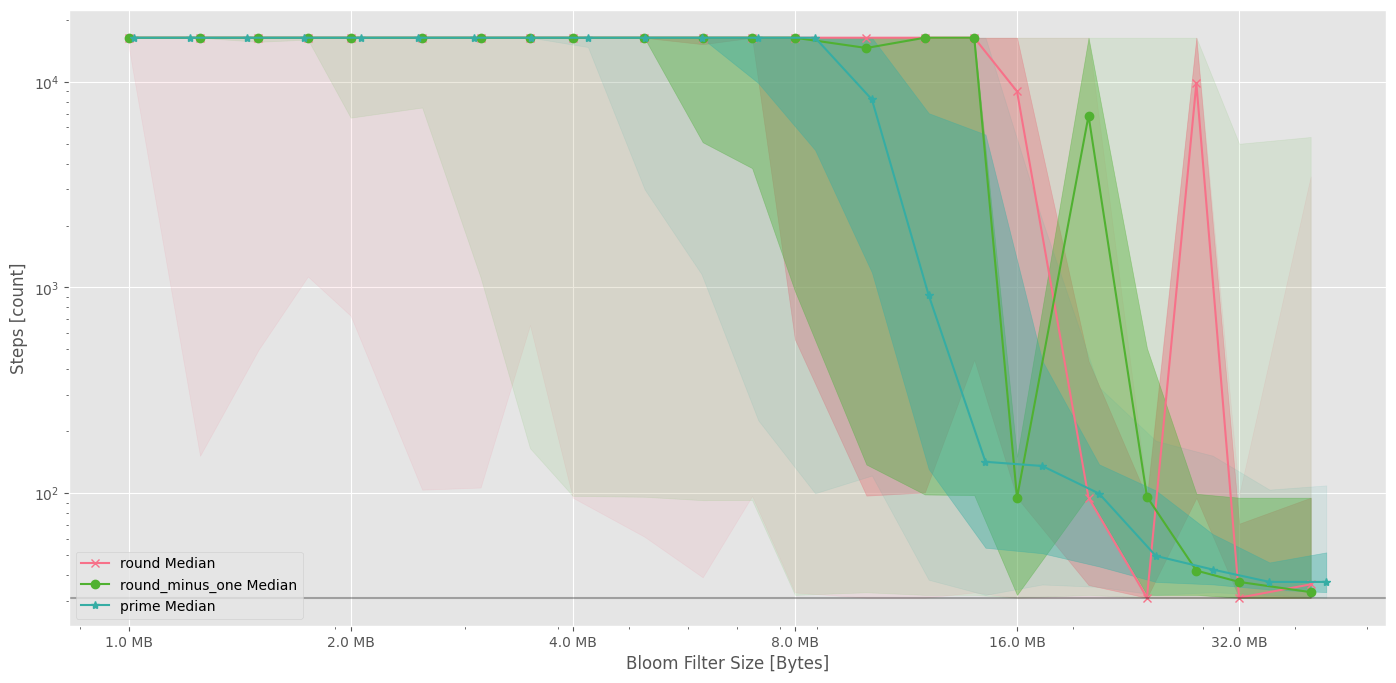

In [ ]:
for category in ["round", "round_minus_one", "prime"]:
    marker = category_markers[category]
    color = category_colors[category]

    data = df_joined[df_joined["size_category"] == category]

    plt.plot(data["size"] / 8, data["median"], label=f"{category} Median", marker=marker, color=color)
    plt.fill_between(data["size"] / 8, data["5%"], data["95%"], alpha=0.1, color=color)
    plt.fill_between(data["size"] / 8, data["25%"], data["75%"], alpha=0.4, color=color)

x = np.sort(df_joined["size"])
plt.axhline(31, color="black", alpha=0.3)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Bloom Filter Size [Bytes]")
plt.ylabel("Steps [count]")

def bytes_to_human_readable(x, pos):
    if x < 1024:
        return "{:.0f} B".format(x)
    elif x < 1024**2:
        return "{:.1f} KB".format(x / 1024)
    else:
        return "{:.1f} MB".format(x / 1024**2)

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(bytes_to_human_readable))
plt.gca().xaxis.set_major_locator(plt.LogLocator(base=2))
plt.gcf().set_size_inches(17, 8)
plt.legend()


restarting(256) preshuffled

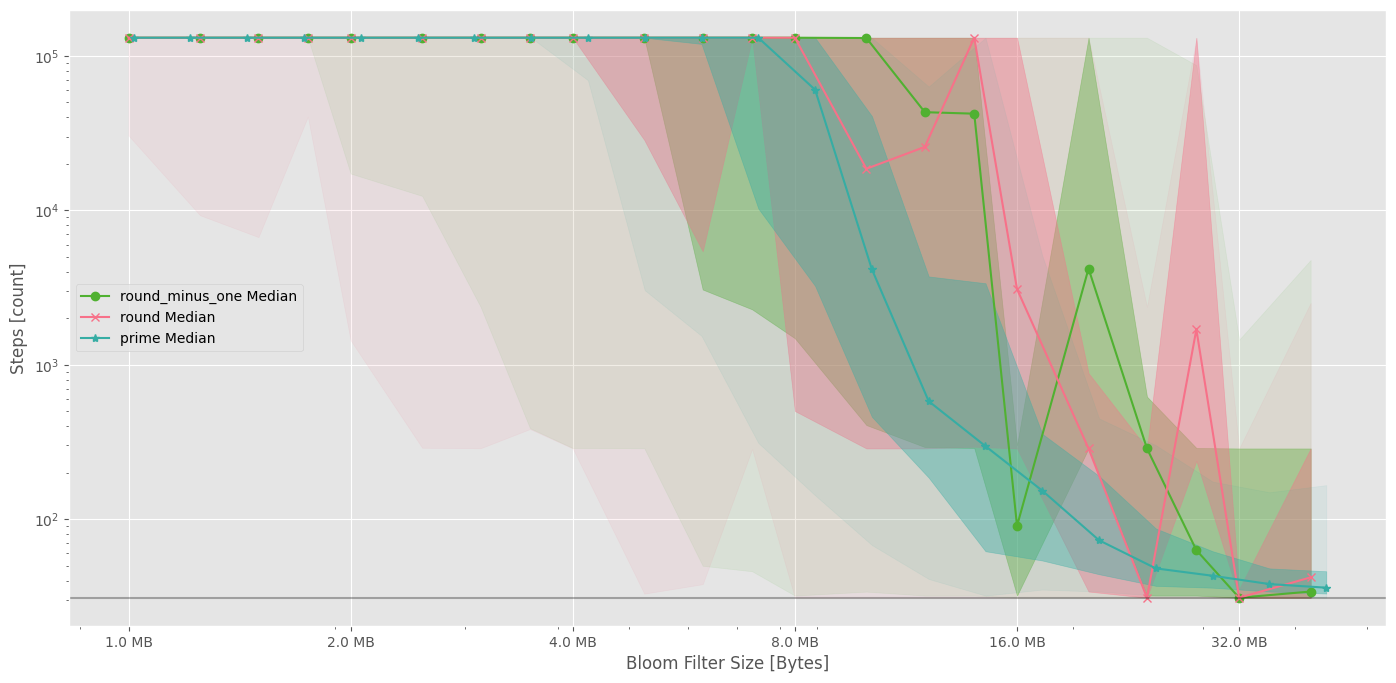

In [ ]:
for category in df_joined["size_category"].unique():
    marker = category_markers[category]
    color = category_colors[category]

    data = df_joined[df_joined["size_category"] == category]

    plt.plot(data["size"] / 8, data["median"], label=f"{category} Median", marker=marker, color=color)
    plt.fill_between(data["size"] / 8, data["5%"], data["95%"], alpha=0.08, color=color)
    plt.fill_between(data["size"] / 8, data["25%"], data["75%"], alpha=0.4, color=color)

x = np.sort(df_joined["size"])
plt.axhline(31, color="black", alpha=0.3)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Bloom Filter Size [Bytes]")
plt.ylabel("Steps [count]")

def bytes_to_human_readable(x, pos):
    if x < 1024:
        return "{:.0f} B".format(x)
    elif x < 1024**2:
        return "{:.1f} KB".format(x / 1024)
    else:
        return "{:.1f} MB".format(x / 1024**2)

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(bytes_to_human_readable))
plt.gca().xaxis.set_major_locator(plt.LogLocator(base=2))
plt.gcf().set_size_inches(17, 8)
plt.legend()


1000 restarting(2048)

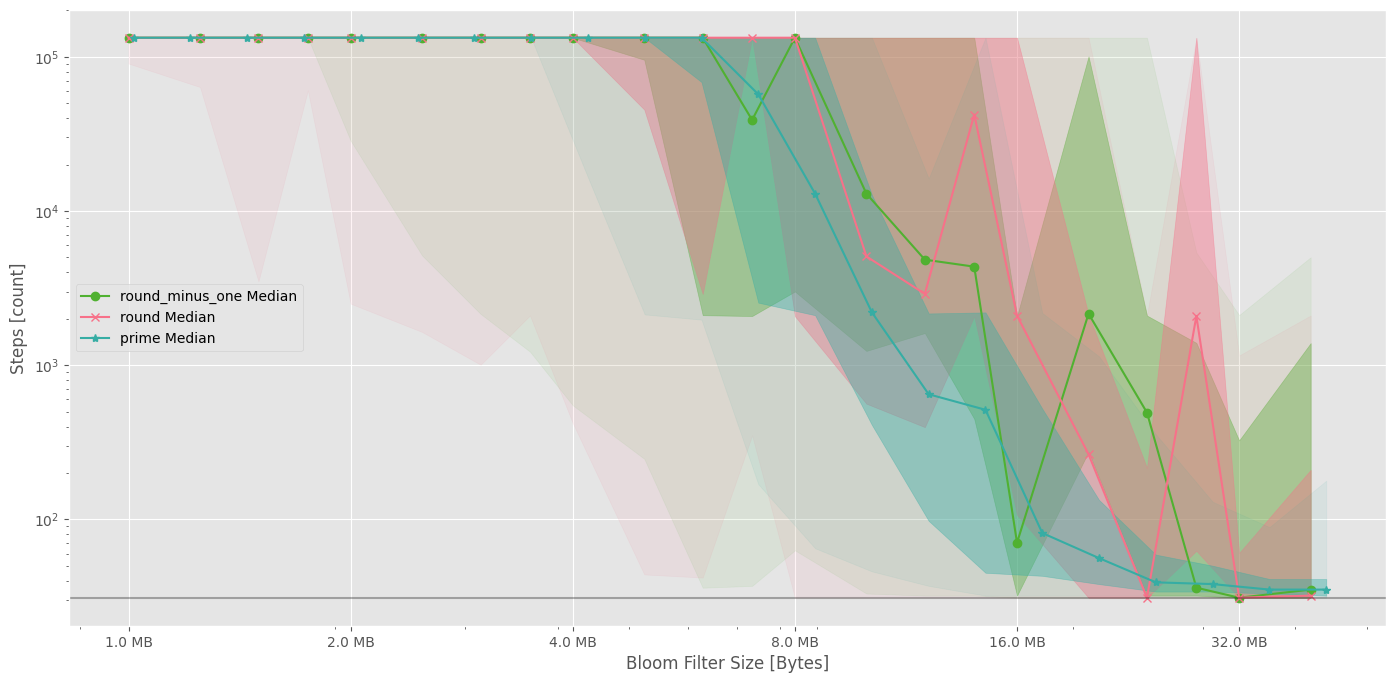

In [ ]:
for category in df_joined["size_category"].unique():
    marker = category_markers[category]
    color = category_colors[category]

    data = df_joined[df_joined["size_category"] == category]

    plt.plot(data["size"] / 8, data["median"], label=f"{category} Median", marker=marker, color=color)
    plt.fill_between(data["size"] / 8, data["5%"], data["95%"], alpha=0.08, color=color)
    plt.fill_between(data["size"] / 8, data["25%"], data["75%"], alpha=0.4, color=color)

x = np.sort(df_joined["size"])
plt.axhline(31, color="black", alpha=0.3)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Bloom Filter Size [Bytes]")
plt.ylabel("Steps [count]")

def bytes_to_human_readable(x, pos):
    if x < 1024:
        return "{:.0f} B".format(x)
    elif x < 1024**2:
        return "{:.1f} KB".format(x / 1024)
    else:
        return "{:.1f} MB".format(x / 1024**2)

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(bytes_to_human_readable))
plt.gca().xaxis.set_major_locator(plt.LogLocator(base=2))
plt.gcf().set_size_inches(17, 8)
plt.legend()


1000

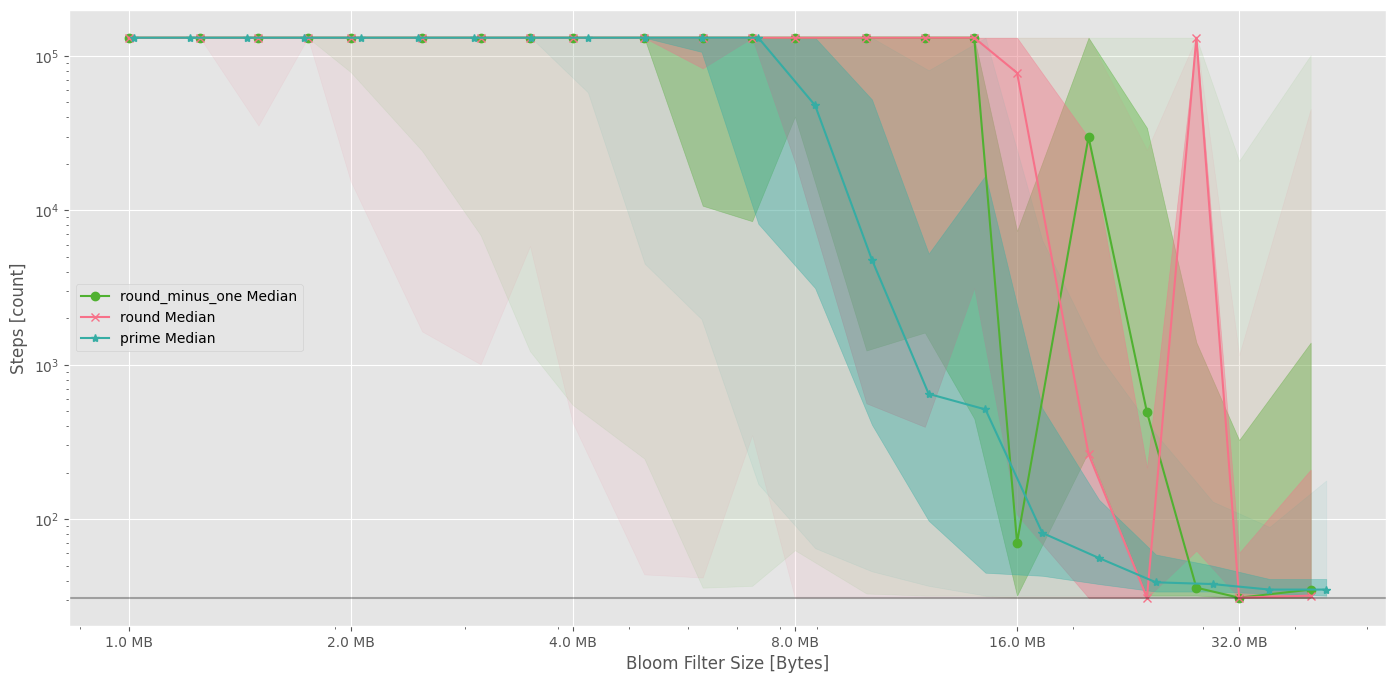

In [ ]:
for category in df_joined["size_category"].unique():
    marker = category_markers[category]
    color = category_colors[category]

    data = df_joined[df_joined["size_category"] == category]

    plt.plot(data["size"] / 8, data["median"], label=f"{category} Median", marker=marker, color=color)
    plt.fill_between(data["size"] / 8, data["5%"], data["95%"], alpha=0.08, color=color)
    plt.fill_between(data["size"] / 8, data["25%"], data["75%"], alpha=0.4, color=color)

x = np.sort(df_joined["size"])
plt.axhline(31, color="black", alpha=0.3)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Bloom Filter Size [Bytes]")
plt.ylabel("Steps [count]")

def bytes_to_human_readable(x, pos):
    if x < 1024:
        return "{:.0f} B".format(x)
    elif x < 1024**2:
        return "{:.1f} KB".format(x / 1024)
    else:
        return "{:.1f} MB".format(x / 1024**2)

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(bytes_to_human_readable))
plt.gca().xaxis.set_major_locator(plt.LogLocator(base=2))
plt.gcf().set_size_inches(17, 8)
plt.legend()


100

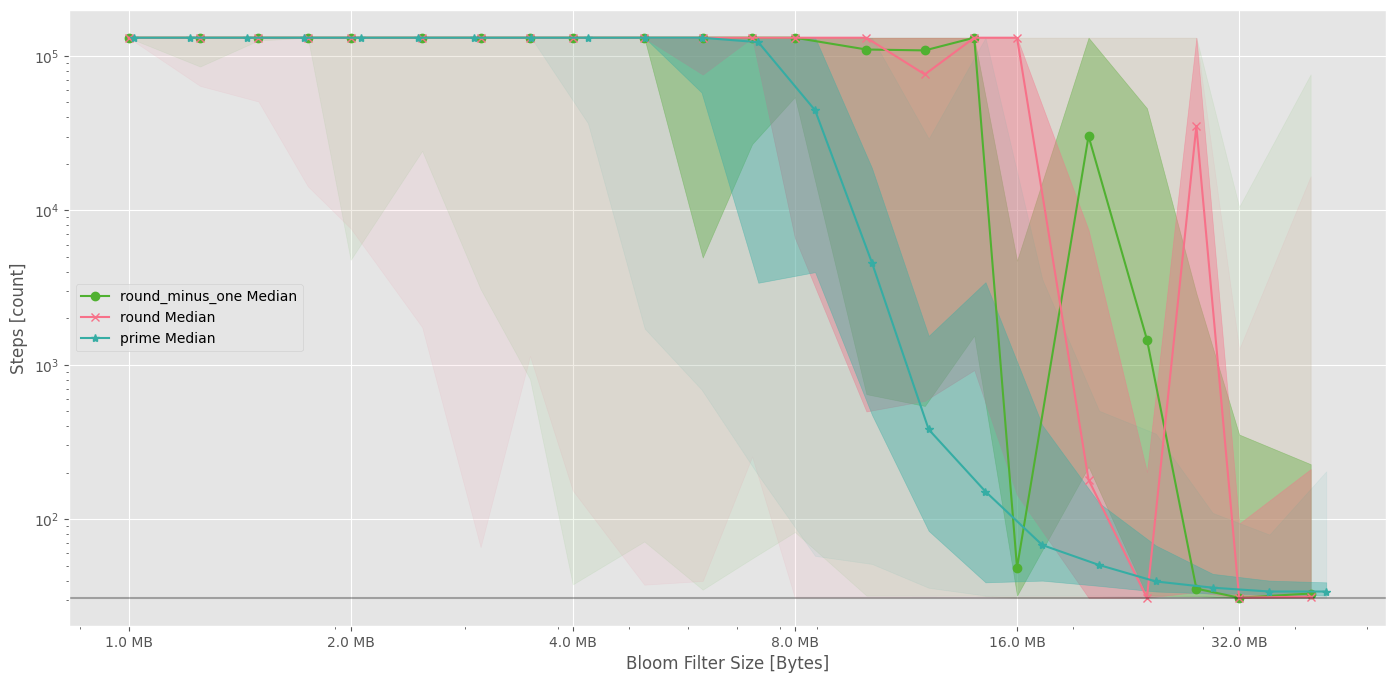

In [ ]:
for category in df_joined["size_category"].unique():
    marker = category_markers[category]
    color = category_colors[category]

    data = df_joined[df_joined["size_category"] == category]

    plt.plot(data["size"] / 8, data["median"], label=f"{category} Median", marker=marker, color=color)
    plt.fill_between(data["size"] / 8, data["5%"], data["95%"], alpha=0.08, color=color)
    plt.fill_between(data["size"] / 8, data["25%"], data["75%"], alpha=0.4, color=color)

x = np.sort(df_joined["size"])
plt.axhline(31, color="black", alpha=0.3)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Bloom Filter Size [Bytes]")
plt.ylabel("Steps [count]")

def bytes_to_human_readable(x, pos):
    if x < 1024:
        return "{:.0f} B".format(x)
    elif x < 1024**2:
        return "{:.1f} KB".format(x / 1024)
    else:
        return "{:.1f} MB".format(x / 1024**2)

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(bytes_to_human_readable))
plt.gca().xaxis.set_major_locator(plt.LogLocator(base=2))
plt.gcf().set_size_inches(17, 8)
plt.legend()


<Axes: >

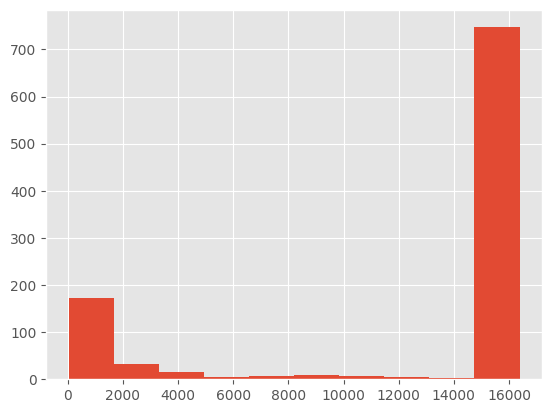

In [262]:
large = df_joined[df_joined["size"] == 67108864].copy()
large["steps"].hist()

# large["midrange"] = large["steps"].map(lambda x: len(list(filter(lambda y: y > 40 and y < 1000, x))))
# large["low"] = large["steps"].map(lambda x: len(list(filter(lambda y: y <= 40, x))))
# large["vlow"] = large["steps"].map(lambda x: len(list(filter(lambda y: y <= 33, x))))
# large["hi"] = large["steps"].map(lambda x: len(list(filter(lambda y: y >= 1000, x))))
# del large["steps"]


# plt.plot(large["size"] / 8, large["midrange"], label="Midrange")
# plt.plot(large["size"] / 8, large["low"], label="Low")
# plt.plot(large["size"] / 8, large["vlow"], label="Very Low")
# plt.plot(large["size"] / 8, large["hi"], label="Hi")

# plt.xscale('log')
# plt.xlabel("Bloom Filter Size [Bytes]")
# plt.ylabel("Count")

# def bytes_to_human_readable(x, pos):
#     if x < 1024:
#         return "{:.0f} B".format(x)
#     elif x < 1024**2:
#         return "{:.1f} KB".format(x / 1024)
#     else:
#         return "{:.1f} MB".format(x / 1024**2)

# plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(bytes_to_human_readable))
# plt.gca().xaxis.set_major_locator(plt.LogLocator(base=2))
# plt.gcf().set_size_inches(15, 8)
# plt.legend()



In [254]:
8*1024*1024*8

67108864

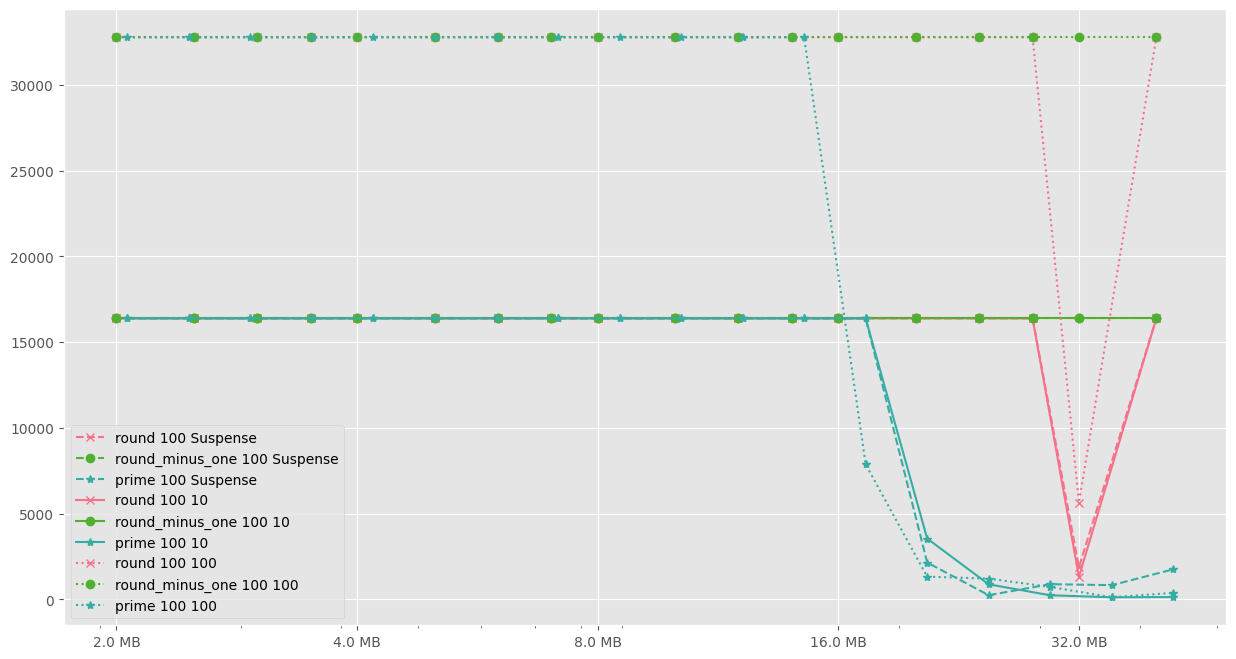

In [10]:
def load(path):
    df1 = pd.read_json(path).rename(columns={0: "steps", 1: "size"})
    df1 = df1[df1["size"] >= min_size]
    df2 = df.join(
        df1.set_index("size"),
        on="size",
        validate="one_to_one",
        sort=True,
        rsuffix="_right",
    )
    df2["50%"] = df2["steps"].map(lambda x: np.percentile(x, 50))
    df2["100%"] = df2["steps"].map(lambda x: np.max(x))
    del df2["steps"]
    return df2


a = [
    (load("../server/solver-steps-suspense.json"), "--", "Suspense"),
    (load("../server/solver-steps-preshuffled-10-attempts.json"), "-", "10"),
    (load("../server/solver-steps-preshuffled-100-attempts.json"), ":", "100"),
]

for mydf, linestyle, name in a:
    for category in ["round", "round_minus_one", "prime"]:
        marker = category_markers[category]
        color = category_colors[category]

        df_to_plot = mydf[mydf["size_category"] == category].sort_values("size")
        plt.plot(
            df_to_plot["size"] / 8,
            df_to_plot["100%"],
            label=f"{category} 100 {name}",
            marker=category_markers[category],
            color=category_colors[category],
            linestyle=linestyle,
        )

plt.xscale('log')
def bytes_to_human_readable(x, pos):
    if x < 1024:
        return "{:.0f} B".format(x)
    elif x < 1024**2:
        return "{:.1f} KB".format(x / 1024)
    else:
        return "{:.1f} MB".format(x / 1024**2)

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(bytes_to_human_readable))
plt.gca().xaxis.set_major_locator(plt.LogLocator(base=2))
plt.gcf().set_size_inches(15, 8)
plt.legend();

So far I prefer the prime 173378771 size (2nd value above 16MB). 21M, compresses down to 12M

compare that to the 10MB one (083886080). 11M, compresses down to 3.6M

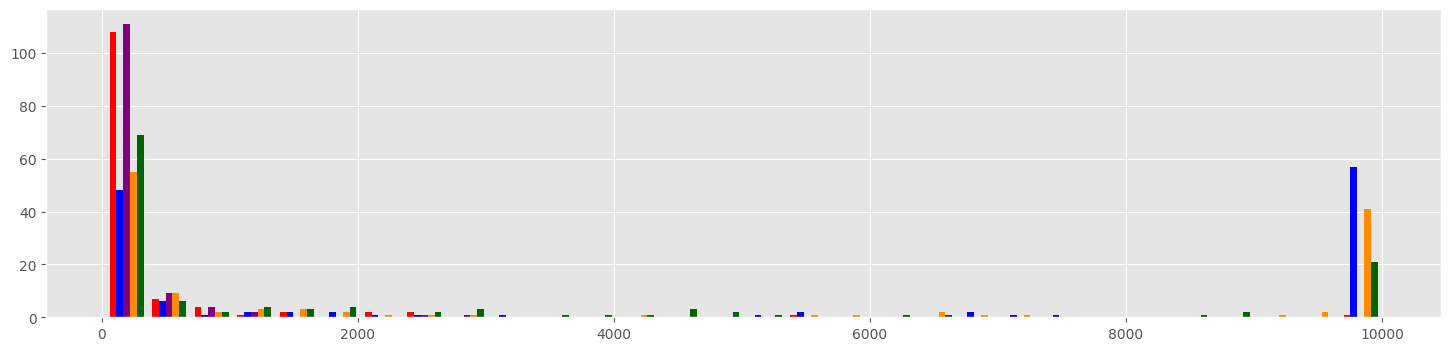

In [68]:
# no cache
a = np.array([31,309,59,33,42,28,26,39,1009,463,39,67,44,98,30,74,102,28,26,40,47,43,62,30,48,92,247,111,1582,50,29,27,308,32,28,32,46,1140,72,59,2418,142,164,48,42,230,73,45,71,34,263,528,146,470,70,69,113,58,32,26,37,5548,30,279,31,32,68,36,116,52,372,412,26,48,127,32,94,39,196,278,27,161,42,41,30,83,54,63,32,30,93,389,279,36,19805,109,2139,37,47,270,44,56,31,56,2498,2276,685,809,30,34,30,57,27,945,41,29,26,1654,59,42,73,35,903,76,41,209,34,146])
b = np.array([135,7140,1000001,2424,1000001,164845,26,33,562,1000001,26,26,528,1000001,28,14768,5667,31,26,238,29,28,1000001,26,26,1007,1000001,213249,1000001,1000001,123,26,1000001,26,39,7543,93598,1000001,41,27,1000001,1000001,26,1000001,1000001,317,43,1000001,29,26,800551,26,1000001,45178,6679,1000001,1000001,26,555,26,318785,12481,713782,90999,26,55,1000001,12080,1000001,1586,12389,1000001,5221,314,97002,1000001,1000001,3203,1341,1000001,12392,2069,9835,36,43,27,1000001,447,464793,378,97,1865,151,1840,1000001,319,68,26,26,912307,26,26,51,6797,1000001,291174,826477,1000001,1000001,1000001,1000001,27,26,1000001,1440,835760,26,28,26,178668,1195,5534,1000001,194548,635862,1000001,509,233])
a = np.minimum(a, np.ones_like(a) * 10000)
b = np.minimum(b, np.ones_like(b) * 10000)

# 2/17 cache
c = np.array([31,277,59,32,42,28,26,39,627,339,39,66,43,94,30,74,79,28,26,38,46,43,55,30,47,85,160,97,742,47,29,27,193,32,28,32,44,704,69,59,413,126,147,46,42,173,73,45,71,34,204,385,139,369,69,66,100,58,32,26,37,2649,30,202,31,32,67,36,99,51,325,372,26,48,115,32,82,39,180,146,27,154,42,41,30,80,53,63,32,30,90,303,158,36,2976,93,1153,35,46,264,44,56,31,56,874,982,368,554,30,34,30,57,27,655,41,29,26,1050,59,42,70,35,654,76,41,173,34,139])
d = np.array([119,2242,100001,561,100001,9397,26,33,344,26733,26,26,303,72705,28,2508,1191,31,26,151,29,28,14568,26,26,566,100001,12983,100001,19979,96,26,100001,26,39,454,5442,100001,39,27,100001,100001,26,100001,38183,172,43,24518,29,26,12587,26,100001,4127,553,15078,23004,26,279,26,6452,1608,24160,5894,26,55,40145,2938,46100,183,1106,100001,1045,180,7228,72663,100001,560,458,47315,1554,819,1793,36,43,27,73930,213,19093,173,75,939,73,529,66729,212,59,26,26,6834,26,26,51,1799,25037,6560,16345,85250,100001,36396,80975,27,26,100001,546,9628,26,28,26,9094,359,1654,100001,12753,9683,27925,239,116])
c = np.minimum(c, np.ones_like(c) * 10000)
d = np.minimum(d, np.ones_like(d) * 10000)

# always cache
e = np.array([70,706,54300,219,20551,1904,26,32,146,4748,26,26,136,12164,28,689,332,31,26,70,29,28,2741,26,26,232,21926,2690,44393,4058,59,26,51253,26,36,156,1341,65151,36,27,19601,21470,26,19034,6046,82,37,4439,29,26,2578,26,20104,1191,165,2899,4584,26,148,26,1502,422,4850,1313,26,43,8841,788,8851,74,316,57836,322,81,1664,13823,18248,188,145,8436,385,263,549,35,43,27,14402,113,3920,102,44,330,44,193,11896,118,50,26,26,1371,26,26,38,559,4356,1237,3378,15736,40425,6615,13964,27,26,38805,178,1822,26,28,26,1805,163,489,55846,2670,1949,5306,105,61])
e = np.minimum(e, np.ones_like(e) * 10000)


plt.hist([a, b, c, d, e], color=["red", "blue", "purple", "darkorange", "darkgreen"], bins=30)
plt.gcf().set_size_inches(18, 4)

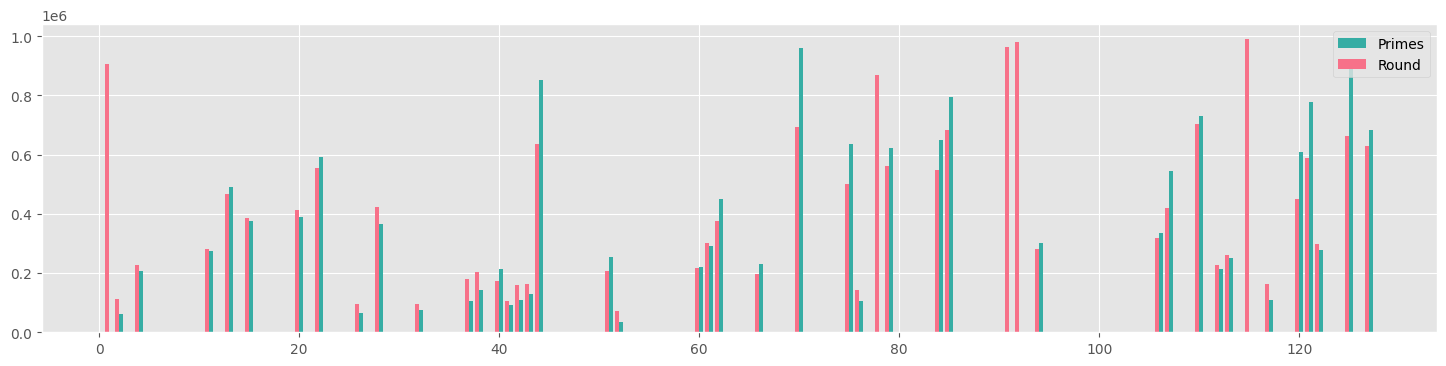

In [69]:
#steps
a = [1000001,1000001,61503,1000001,206304,1000001,1000001,1000001,1000001,1000001,1000001,273563,1000001,489241,1000001,376717,1000001,1000001,1000001,1000001,388929,1000001,591446,1000001,1000001,1000001,63927,1000001,366147,1000001,1000001,1000001,73757,1000001,1000001,1000001,1000001,106732,141710,1000001,212237,93439,109290,130590,853243,1000001,1000001,1000001,1000001,1000001,1000001,252609,35093,1000001,1000001,1000001,1000001,1000001,1000001,1000001,219271,290669,449017,1000001,1000001,1000001,229292,1000001,1000001,1000001,960866,1000001,1000001,1000001,1000001,636499,104544,1000001,1000001,624150,1000001,1000001,1000001,1000001,649808,794861,1000001,1000001,1000001,1000001,1000001,1000001,1000001,1000001,301570,1000001,1000001,1000001,1000001,1000001,1000001,1000001,1000001,1000001,1000001,1000001,336659,544164,1000001,1000001,729105,1000001,212126,252226,1000001,1000001,1000001,107737,1000001,1000001,607939,776764,277760,1000001,1000001,890052,1000001,683774]
b = [1000001,906472,112369,1000001,227627,1000001,1000001,1000001,1000001,1000001,1000001,279714,1000001,465858,1000001,386630,1000001,1000001,1000001,1000001,412827,1000001,555235,1000001,1000001,1000001,93938,1000001,424637,1000001,1000001,1000001,96719,1000001,1000001,1000001,1000001,179718,203955,1000001,173363,106752,158986,164057,636875,1000001,1000001,1000001,1000001,1000001,1000001,206534,73241,1000001,1000001,1000001,1000001,1000001,1000001,1000001,217861,301654,377316,1000001,1000001,1000001,196979,1000001,1000001,1000001,691825,1000001,1000001,1000001,1000001,501811,144207,1000001,869313,560711,1000001,1000001,1000001,1000001,547308,684109,1000001,1000001,1000001,1000001,1000001,964614,982009,1000001,279827,1000001,1000001,1000001,1000001,1000001,1000001,1000001,1000001,1000001,1000001,1000001,317162,420462,1000001,1000001,705060,1000001,226983,261099,1000001,990864,1000001,162286,1000001,1000001,449660,590220,299698,1000001,1000001,664019,1000001,628158]

#max size
# a = [572580,185381,8112,617412,28033,548842,559130,891752,566437,311809,484411,36434,431240,65755,591618,50248,784911,890743,814107,412938,51414,517661,76765,601052,487635,550359,8350,192971,49436,606191,739565,625440,10120,447687,488721,576956,286588,13729,18525,286044,29261,13321,14763,16722,126186,641594,582900,980185,321307,738282,323595,35484,4526,331369,184071,465916,403641,767330,637761,945637,29348,38303,63130,622164,615638,325134,31663,545326,336746,325134,146414,361018,554203,685042,235619,89146,14137,481476,162895,89830,203397,208045,246620,597185,90359,110857,167204,571396,952170,489859,313706,182908,176984,781376,41856,877707,453196,344865,358352,203961,537503,231158,622432,694352,320142,187605,47267,77147,174174,453059,94238,285714,29383,34113,426946,189268,688168,13592,447793,230341,86617,114754,37588,531011,200922,129447,342494,94692]
# b = [641283,144183,17058,691687,35534,540438,596675,672022,483979,260511,484727,44042,421702,77622,722314,57882,839007,1037831,878422,431711,64965,592424,91876,529325,432266,488754,12825,166900,69945,692522,817430,681521,12823,383013,482874,498585,278509,29448,29998,240605,23574,14226,23411,23310,96206,755033,487321,633561,302215,801833,314366,28546,11826,279255,166198,424717,456853,836387,730366,1017502,33452,47751,55276,516507,670758,269448,27000,605248,306547,269448,103873,324580,454816,751759,218921,78592,21831,529972,139585,91249,175667,190838,236751,645582,89128,100267,166640,650518,656703,480563,293149,150306,166023,892143,42629,612420,475353,331474,337954,182303,593291,192874,486751,789420,282323,188393,48124,64637,159933,448579,110543,260907,34083,38812,520166,156376,762981,24052,410070,219060,66691,93138,44381,637327,174311,103426,315238,103123]

x = np.arange(len(a))

a = np.array(a, dtype=np.float32)
b = np.array(b, dtype=np.float32)
a[a == 1000001] = np.nan
b[b == 1000001] = np.nan

plt.bar(x + 0.2, a, width=0.4, color=category_colors["prime"], label="Primes")
plt.bar(x - 0.2, b, width=0.4, color=category_colors["round"], label="Round")

# plt.bar(x, a - b, width=0.4, label="Diff")

plt.gcf().set_size_inches(18, 4)
plt.legend();